In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("drive/My Drive/code_ques.csv")
df.head()

,0,1,2,3,4,5,6,7,8,9,...,759,760,761,762,763,764,765,766,767,score
0,-1.355365,2.348287,1.030452,-1.503548,-0.380958,1.095197,-2.063201,-1.657276,0.780015,0.224140,...,-2.330601,0.542652,-1.660974,-2.150713,0.545611,-1.614411,-0.133085,-2.134145,1.184289,10.0
1,-1.403411,2.131454,1.117223,-1.542901,-0.351417,1.042730,-2.025140,-1.812830,0.707280,0.165037,...,-2.183963,0.488854,-1.674375,-2.027182,0.514854,-1.625416,0.014533,-2.156347,1.088794,8.0
2,-1.388594,2.358305,0.994477,-1.480365,-0.382565,1.104627,-2.042682,-1.669257,0.800453,0.265268,...,-2.347989,0.555944,-1.651969,-2.149015,0.582454,-1.606852,-0.164269,-2.139201,1.158317,7.0
3,-1.352139,2.155489,1.027737,-1.424550,-0.316464,1.111701,-2.039937,-1.789147,0.725883,0.298638,...,-2.216481,0.487809,-1.595799,-2.143987,0.419316,-1.635483,-0.074271,-2.112344,1.094625,5.0
4,-1.411875,2.337363,1.050743,-1.506995,-0.321872,1.118751,-2.068671,-1.603735,0.730069,0.242844,...,-2.279187,0.451709,-1.607142,-2.184134,0.521283,-1.604708,-0.055002,-2.056900,1.290956,6.0


In [ ]:
for col in df.columns:
  if df[col].isnull().sum()>0:
    print(col)
    print(df[col].isnull().sum())

score
4


In [ ]:
#df.dropna(inplace=True)

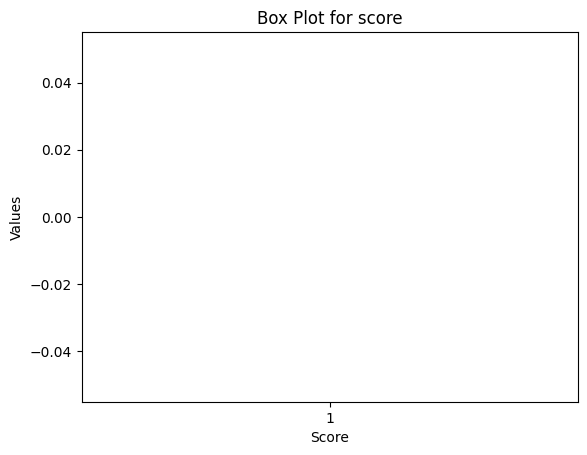

In [ ]:
plt.boxplot(df['score'])
column_name='score'
# Set plot labels
plt.xlabel('Score')
plt.ylabel('Values')
plt.title(f'Box Plot for {column_name}')

# Show the plot
plt.show()

In [ ]:
from scipy import stats
z_scores = stats.zscore(df['score'])

# Set a threshold (e.g., 3) to identify outliers
threshold = 3
outliers = df[abs(z_scores) > threshold]

print("Outliers using Z-Score:")
print(outliers)

Outliers using Z-Score:
Empty DataFrame
Columns: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]
Index: []

[0 rows x 769 columns]


In [ ]:
mean_value = df['score'].mean()

df[column_name].fillna(mean_value, inplace=True)

# Display the DataFrame after imputation
print("DataFrame after imputation:")
df.head()

DataFrame after imputation:


,0,1,2,3,4,5,6,7,8,9,...,759,760,761,762,763,764,765,766,767,score
0,-1.355365,2.348287,1.030452,-1.503548,-0.380958,1.095197,-2.063201,-1.657276,0.780015,0.224140,...,-2.330601,0.542652,-1.660974,-2.150713,0.545611,-1.614411,-0.133085,-2.134145,1.184289,10.0
1,-1.403411,2.131454,1.117223,-1.542901,-0.351417,1.042730,-2.025140,-1.812830,0.707280,0.165037,...,-2.183963,0.488854,-1.674375,-2.027182,0.514854,-1.625416,0.014533,-2.156347,1.088794,8.0
2,-1.388594,2.358305,0.994477,-1.480365,-0.382565,1.104627,-2.042682,-1.669257,0.800453,0.265268,...,-2.347989,0.555944,-1.651969,-2.149015,0.582454,-1.606852,-0.164269,-2.139201,1.158317,7.0
3,-1.352139,2.155489,1.027737,-1.424550,-0.316464,1.111701,-2.039937,-1.789147,0.725883,0.298638,...,-2.216481,0.487809,-1.595799,-2.143987,0.419316,-1.635483,-0.074271,-2.112344,1.094625,5.0
4,-1.411875,2.337363,1.050743,-1.506995,-0.321872,1.118751,-2.068671,-1.603735,0.730069,0.242844,...,-2.279187,0.451709,-1.607142,-2.184134,0.521283,-1.604708,-0.055002,-2.056900,1.290956,6.0


In [ ]:
flag=False
for col in df.columns:
  if df[col].isnull().sum()>0:
    flag=True
    print(col)
    print(df[col].isnull().sum())
if flag==False:
  print("NO NULL VALUES")

NO NULL VALUES


In [ ]:
df.shape

(1176, 769)

In [ ]:
df['Final_score'] = np.where(df['score'] > 5, 1, 0)

In [ ]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,760,761,762,763,764,765,766,767,score,Final_score
count,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,...,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000
mean,-1.253594,-0.465979,0.229329,0.372101,0.277136,0.865536,-0.554721,-1.280188,-0.392907,-0.226238,...,-0.091959,-0.700593,0.046954,-0.719960,-1.752216,-0.451238,-0.377730,0.211044,6.238908,0.672619
std,1.204115,1.399195,1.165310,0.871044,0.967215,0.930031,1.271228,1.581162,1.014660,1.032897,...,1.109095,1.204651,1.262044,1.084299,1.040505,1.100149,1.154632,1.158732,3.275259,0.469457
min,-4.964680,-4.291207,-3.836382,-2.519691,-2.327611,-4.050520,-3.307933,-5.572669,-3.264831,-3.251885,...,-3.082759,-3.774958,-2.943283,-4.615528,-3.997977,-2.975710,-3.766625,-3.390907,0.000000,0.000000
25%,-1.976430,-1.321678,-0.498208,-0.137077,-0.397124,0.154785,-1.529384,-2.627281,-1.060415,-0.876954,...,-0.635372,-1.569121,-0.963254,-1.351840,-2.593652,-1.246046,-1.236310,-0.639309,5.000000,0.000000
50%,-1.320060,-0.528970,0.304345,0.316335,0.164286,0.712414,-0.673306,-1.062531,-0.610422,-0.122351,...,0.018466,-0.864093,0.157150,-0.634270,-1.669737,-0.446756,-0.264185,0.060384,6.000000,1.000000
75%,-0.566802,0.476583,1.044464,1.007085,0.924620,1.626414,0.208969,0.002230,0.315335,0.306526,...,0.522782,0.463358,1.042679,0.029348,-0.986729,0.334036,0.539263,0.954257,8.000000,1.000000
max,2.057063,2.867949,2.698387,2.857039,3.281687,3.100244,4.445419,2.208376,2.195000,3.159068,...,3.256764,1.741923,2.987825,1.532733,1.128014,2.951406,2.301465,3.160130,88.000000,1.000000
